# python assignment

# 1. Document Dr. X's function with comments and with markdown text 

In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [4]:
def get_sequences_from_file(fasta_fn): # define a function in python to get sequences from a file 
    sequence_data_dict = {} # creat a dictionary with species_name as key and a string of sequences as value
    for record in SeqIO.parse(fasta_fn, "fasta"): # use parse function in Biopython to loop through each individual record to get the information from description
        description = record.description.split() # to split or seperate the word in description
        species_name = description[1] + " " + description[2] # extract the first and second word in description as species name
        sequence_data_dict[species_name] = record.seq # set each key the corresponding sequence as value
    return(sequence_data_dict) # print out the created dictionary

In [5]:
bear_dna = get_sequences_from_file("bears_cytb.fasta") # test the defined function of getting sequences from fasta file

In [6]:
bear_dna

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

# 2 Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [7]:
def translate_function(string_nucleotides): # define a function in python to translate nucleotides to amino acids
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get the vertebrate mitochondrial codon table for translation
    aa_seq_string = "" # 
    stop = string_nucleotides.find('TAA')|string_nucleotides.find('TAG')|string_nucleotides.find('AGA')|string_nucleotides.find('AGG')
    cds = str(string_nucleotides[0:stop])
    for i in range (0, len(string_nucleotides)-3,3):
        if cds[i:i+3] in mito_table.forward_table:
            aa_seq_string += mito_table.forward_table[cds[i:i+3]]
    return(aa_seq_string)

In [8]:
dd = translate_function('ATGTACTACACTAGA') # test the defined translate function
dd

'MYYT'

# 3 Alternative way to translate DNA into Protein

In [9]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
def my_translate_function(n_strings): # define my own translate function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # use the vertebrate mitochondrial codon table for translation
    my_seq = Seq(n_strings, IUPAC.unambiguous_dna) # set a nucleotide Seq format for translation
    p_strings = my_seq.translate(table=mito_table,to_stop=True) # use "translate" function in Seq to translate the formatted nucleotides into protein
    return(p_strings) # print out the amino acids sequence after translation

In [10]:
my_translate_function("ATCACC") # test the defined translate function

Seq('IT', IUPACProtein())

# 4 Write a function that calculates the molecular weight of each amino acid sequence

In [11]:
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight
from Bio.Alphabet import IUPAC
def aa_molecular_weight(aa_strings): # define a function to calculate molecular weight for protein sequence
    aa_seq = Seq(aa_strings, IUPAC.protein) # set a Seq amino acid sequence format for calculating molecular weight
    aa_weight = molecular_weight(aa_seq) # use the "molecular_weight" function in SeqUtils to calculate molecular weight
    return (aa_weight) # print out the molecular weight of protein sequence

In [13]:
aa_molecular_weight("ATGACGGG") # test the defined molecular weigth calculation function

592.6231

# 5. Write a function that computes the GC-content of each DNA sequence

In [16]:
from Bio.SeqUtils import GC
def GC_Content(n_strings): # define a function to calculate GC percentage for given nucleotide sequences
    my_seq = Seq(n_strings, IUPAC.unambiguous_dna) # set a nucleotide Seq format for GC concent calculation
    GC_percent = GC(my_seq) # use "GC" function in SeqUtils to calculate GC concent
    return (GC_percent) # print out GC concent

In [17]:
GC_Content("ATGACCAGGGTTTCC") # test the defined GC concent calculation function

53.333333333333336

# 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content

In [23]:
cytb_seq = get_sequences_from_file('bears_cytb.fasta') # get the sequences from fasta file and save them in a dictionary with species name as the key and sequences as value 
bears_df = pd.read_csv("bears_mass.csv") # read the csv file into a dataframe
bears_df['molecular_weight'] = "NaN" # add a new column (with the name molecular_weight) to the dataframe and set the value as NaN
bears_df['GC_content'] = "NaN" # add a new column (with the name GC_content) to the dataframe and set the value as NaN

In [24]:
bears_df # check the dataframe to see if 2 columns with values as NaN have been appended to the dataframe

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


# 7. Call your functions from step 3 (or step 2) and step 4 and 5 and fill in the new columns in the DataFrame

In [42]:
for index, row in bears_df.iterrows(): # to loop through dataframe with iterrows() function
    species_list = row ['species'] # extract the names of the key for cytb_seq dictionary
    n_seq = cytb_seq[species_list] # use the names of the key to extract the corresponding nucleotide sequence
    bears_df.loc[index,'molecular_weight'] = aa_molecular_weight (str(my_translate_function(str(n_seq)))) # use the 2 defined function to translate and calculate protein molecular weight 
    bears_df.loc[index,'GC_content'] = GC_Content(str(n_seq)) # use the defined function to calculate GC content and then put them into the dataframe

In [43]:
bears_df

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


# 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
##     a. What is the largest bear species? 
##     b. What else is interesting about this species?

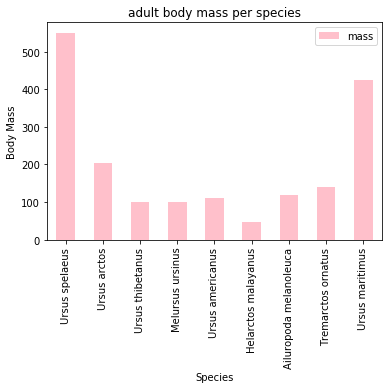

In [47]:
import matplotlib.pyplot as plt
bears_mass = bears_df[['species','mass']] # subset 2 columns and save them to a new dataframe for bar plot
mass_plot = bears_mass.plot(kind='bar', title='adult body mass per species',color='pink') # generate bar plot 
mass_plot.set_ylabel("Body Mass") # set y axis as "Body Mass"
mass_plot.set_xlabel("Species") # set x axis as "Species"
mass_plot.set_xticklabels(bears_mass['species']) # specify x marks as species name
mass_plot # display bar plot

# Q: what is the largest bear species? A: Ursus spelaeus
# what else is interesting about this species? A: Ursus spelaeus is a species of bear that became extinct about
# 24,000 years ago during the Last Glacial Maximum 

# 9 Plot a graph that shows the molecular weight as a function of GC content

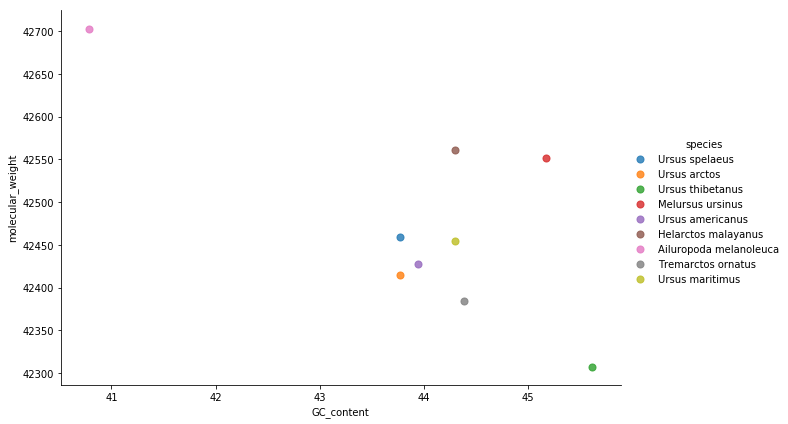

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot("GC_content","molecular_weight", data=bears_df, fit_reg = False, height=6, aspect=1.5,scatter_kws={'s':50}, hue = 'species' )

# 10  Write the entire DataFrame to a new CSV file that includes your new columns

In [57]:
bears_df.to_csv("bears_data.csv", sep=',', index=False) # write dataframe to csv file

In [58]:
pd.read_csv('bears_data.csv') # read the csv file and check if the csv file was correctly created

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


# 11 BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15)